In [1]:
import pandas as pd
import jsonpickle
import numpy as np
import matplotlib.pyplot as plt
import os, os.path
import dateutil.parser

In [2]:
# FILE_AS_ROOT = False
FILE_TO_ROOT = '../../../../../../'
PATH_TO_JSON_STATES = f"{FILE_TO_ROOT}tagging_json_states"
# JSON_FILE_TO_IMPORT = f"{ FILE_TO_ROOT if FILE_AS_ROOT else '../'}tagging_data_personal.json" 
# SCRIPT_PATH = "./src/python/psic/stats/tagging_stats"
# FILE_TO_TAG_RATIO = f"{'./' if FILE_AS_ROOT else './src/python/psic/stats/tagging_stats'}tag_ratio.csv"
# TAGGING_STATES_FOLDER = f"{ FILE_TO_ROOT if FILE_AS_ROOT else '../'}tagging_json_states"

In [3]:
# TOTAL_JSON_STATES = (len([name for name in os.listdir(TAGGING_STATES_FOLDER) if os.path.isfile(os.path.join(TAGGING_STATES_FOLDER, name))]))
# TOTAL_JSON_STATES

In [4]:
def get_pickle(path_to_file):
    with open(path_to_file, 'r') as f:
        return jsonpickle.decode(f.read())

In [5]:
def how_many_tagged(pickle_file):
    
    done_tagging_count=len(pickle_file.finished_tagged_queue)
    tagged_but_not_done_count=0
    
    for image in pickle_file.pending_images_queue:
        if len(image.get_taggers()) > 0:
            tagged_but_not_done_count-=-1
    
    return pd.DataFrame([{ 
        'not_done':tagged_but_not_done_count,
        'done':done_tagging_count,
        'tagged_ratio': tagged_but_not_done_count/(tagged_but_not_done_count+done_tagging_count)
     }])

In [6]:
def get_all_json_states():
    path = os.getcwd()
    files = os.listdir(PATH_TO_JSON_STATES)
    filter_by_type = [f for f in files if f[-4:] == 'json']
    filter_by_type.sort()
    
    return filter_by_type


In [7]:
files_json = get_all_json_states()

In [8]:
def get_tagged_ratio(files):
    
    main_df = pd.DataFrame()
    
    for file in files[::50]:
        path = f"{PATH_TO_JSON_STATES}/{file}"
        
        remove_name = file.split('assigner_state-root-')[-1]
        date_string = remove_name.split('.json')[0]
        removed_nano = date_string.split('.')[0].replace("_",":")
        time = dateutil.parser.parse(removed_nano).strftime('%s')
        time_df= pd.DataFrame([{'time':time,'name':date_string}])    
        
        tag_df = how_many_tagged(get_pickle(path))
        
        combined_df = pd.concat([time_df,tag_df],axis=1, sort=False)
        main_df = pd.concat([combined_df,main_df],ignore_index=True)
        
    return main_df

In [9]:
df = get_tagged_ratio(files_json)
df_time_sort = df.sort_values(by=['time'])

In [10]:
df_time_sort.head()

,time,name,not_done,done,tagged_ratio
17,1573446648,2019-11-10T23_30_48.430349,237,0,1.000000
16,1573522418,2019-11-11T20_33_38.520814,216,20,0.915254
15,1573558785,2019-11-12T06_39_45.766386,195,40,0.829787
14,1573559335,2019-11-12T06_48_55.595966,175,61,0.741525
13,1573589450,2019-11-12T15_10_50.669186,158,79,0.666667


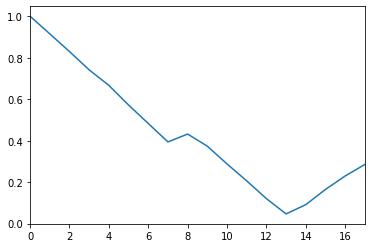

In [11]:
pd.Series(df_time_sort['tagged_ratio'].values).plot.line()